# 9장 다중 분류 (Mulitnomial classification)

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [1]:
# 한글 폰트 설치

# !sudo apt-get install -y fonts-nanum* | tail -n 1
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

In [2]:
# 필요 라이브러리 설치

# !pip install torchviz | tail -n 1
# !pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [3]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [4]:
# 파이토치 관련 라이브러리
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

# Iris dataset
import pandas  as pd
# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [6]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## Iris data

### 데이터 불러오기

In [7]:
# 학습용 데이터 준비

# 라이브러리 임포트
# from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()
print("iris = \n", iris)
print('iris keys = \n', iris.keys())
print("target_names = \n", iris["target_names"])

iris = 
 {'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.

In [8]:
# 입력 데이터와 정답 데이터
x_org, y_org = iris.data, iris.target

# 결과 확인
print('원본 데이터 타입 :', type(x_org), type(y_org))
print('원본 데이터 크기 :', x_org.shape, y_org.shape)

원본 데이터 타입 : <class 'numpy.ndarray'> <class 'numpy.ndarray'>
원본 데이터 크기 : (150, 4) (150,)


### 데이터 추출

In [9]:
# 입력 데이터로 sepal(꽃받침) length(0)와 petal(꽃잎) length(2)를 추출
x_select = x_org[:,[0,2]]

# 결과 확인
print('원본 데이터', x_select.shape, y_org.shape)

원본 데이터 (150, 2) (150,)


### 훈련 데이터와 검증 데이터 분할

In [ ]:
# 훈련 데이터와 검증 데이터로 분할(셔플도 동시에 실시함)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
#총 데이터수가 150개 이상이어야 오류 안남 

(75, 2) (75, 2) (75,) (75,)


### 훈련 데이터의 산포도 출력

In [11]:
# 데이터를 정답별로 분할

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

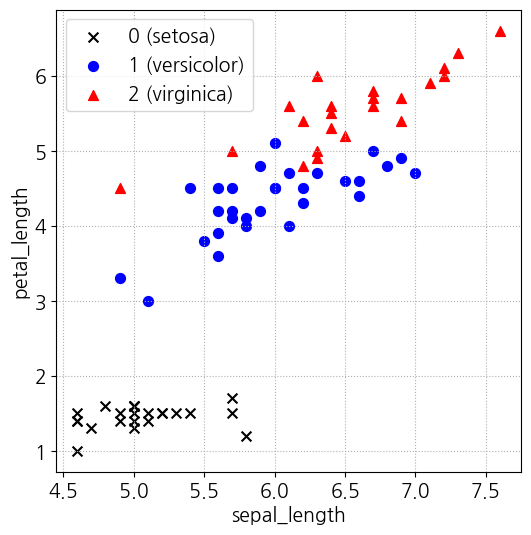

In [12]:
# 산포도 출력

plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolor)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='^', c='r', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [13]:
inputs =torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

print("inputs shape =",inputs.shape)
print("labels shape =", labels.shape)


inputs shape = torch.Size([75, 2])
labels shape = torch.Size([75])


### 모델 정의

In [14]:
# 학습용 파라미터 설정

# 입력 차원수
n_input = x_train.shape[1]

# 출력 차원수
# 분류 클래스 수, 여기서는 3
n_output = len(list(set(y_train)))

# 결과 확인
print(f'n_input: {n_input}  n_output: {n_output}')

n_input: 2  n_output: 3


In [15]:
# 모델 정의
# 2입력 3출력 로지스틱 회귀 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        #self.softmax = nn.Softmax() #사용하지 않는 이유 알기 

        # 초깃값을 모두 1로 함
        # "딥러닝을 위한 수학"과 조건을 맞추기 위한 목적
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1

# 인스턴스 생성
net = Net(n_input, n_output)
# list(net.parameters())

### 모델 확인

In [16]:
# 모델 내부 파라미터 확인
# l1.weight는 행렬, l1.bias는 벡터

for parameter in net.named_parameters(): #MSELoss 
    print(parameter)


('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [17]:
# 모델 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=2, out_features=3, bias=True)
)


In [18]:
# 모델 개요 표시 2

summary(net, (100,2), device = 'cpu')

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 3]                  --
├─Linear: 1-1                            [100, 3]                  9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### 최적화 알고리즘과 손실 함수의 정의

In [19]:
# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

In [20]:
print("inputs shape= ",inputs.shape)
outputs=net(inputs)
print("outputs shape= ",outputs.shape)


inputs shape=  torch.Size([75, 2])
outputs shape=  torch.Size([75, 3])


### 경사 하강법

In [21]:
# 입력 데이터 x_train과 정답 데이터 y_train의 텐서 변수화

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

# 검증 데이터의 텐서 변수화

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

### 손실의 계산 그래프 시각화

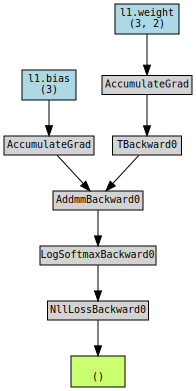

In [22]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실의 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

### 예측 라벨을 얻는 방법

In [23]:
# torch.max 함수 호출
# 2번째 인수는 축을 의미함. 1이면 행별로 집계
print(torch.max(outputs, 1))
# print(torch.argmax(outputs, 1))

# 예측 라벨 리스트를 취득
torch.max(outputs, 1)[1]

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

### 반복 계산

In [24]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10000

# 평가 결과 기록
history = np.zeros((0,5))

In [25]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):

    # 훈련 페이즈 #training 

    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.argmax(outputs, dim=1)

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).float().mean() 

    # 예측 페이즈

    # 예측 계산 ###Test 
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = outputs_test.argmax(1)

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).float().mean() 

    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], train loss: {train_loss:.4f} train acc: {train_acc:.4f} val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], train loss: 1.0986 train acc: 0.3067 val_loss: 1.0926, val_acc: 0.2667
Epoch [10/10000], train loss: 1.0358 train acc: 0.4000 val_loss: 1.0640, val_acc: 0.2667
Epoch [20/10000], train loss: 1.0048 train acc: 0.4000 val_loss: 1.0335, val_acc: 0.2667
Epoch [30/10000], train loss: 0.9767 train acc: 0.4000 val_loss: 1.0026, val_acc: 0.2667
Epoch [40/10000], train loss: 0.9506 train acc: 0.4133 val_loss: 0.9735, val_acc: 0.2667
Epoch [50/10000], train loss: 0.9262 train acc: 0.4800 val_loss: 0.9463, val_acc: 0.3867
Epoch [60/10000], train loss: 0.9034 train acc: 0.6933 val_loss: 0.9210, val_acc: 0.5600
Epoch [70/10000], train loss: 0.8821 train acc: 0.7067 val_loss: 0.8974, val_acc: 0.6000
Epoch [80/10000], train loss: 0.8623 train acc: 0.7067 val_loss: 0.8755, val_acc: 0.6133
Epoch [90/10000], train loss: 0.8437 train acc: 0.7067 val_loss: 0.8550, val_acc: 0.6267
Epoch [100/10000], train loss: 0.8264 train acc: 0.7067 val_loss: 0.8359, val_acc: 0.6267
Epoch [110/10000], tr

### 결과 확인

In [26]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.09263  정확도 : 0.26667
최종상태 : 손실 : 0.19795  정확도 : 0.96000


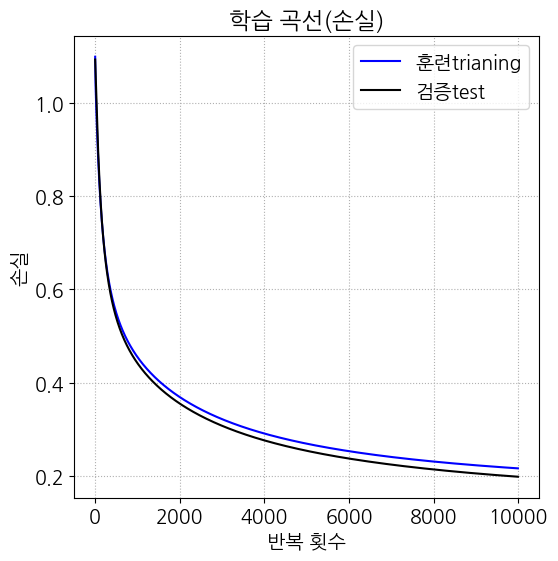

In [27]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련trianing')
plt.plot(history[:,0], history[:,3], 'k', label='검증test')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

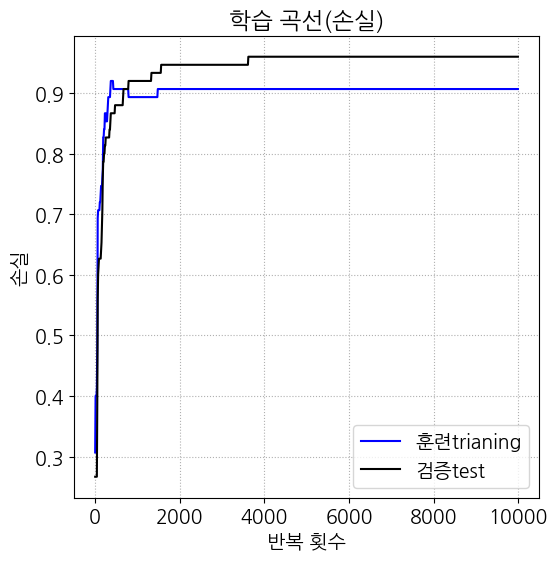

In [28]:
plt.plot(history[:,0], history[:,2], 'b', label='훈련trianing')
plt.plot(history[:,0], history[:,4], 'k', label='검증test')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

### 모델 출력 확인

In [29]:
# 정답 데이터의 0번째, 2번째, 3번째를 추출

print(labels[[0,2,3]])

# 이에 해당하는 입력값을 추출
print("="*50)
i3 = inputs[[0,2,3],:]
print(i3.data.numpy())

tensor([1, 0, 2])
[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


In [30]:
# 출력값에 소프트맥스 함수를 적용한 결과를 취득

softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print(o3.data.numpy()) #linear output 
print(k3.data.numpy()) 

[[ 8.8071 14.1937 12.9986]
 [12.8262  9.8     0.1734]
 [ 6.7954 15.0928 17.1111]]
[[0.0035 0.765  0.2315]
 [0.9537 0.0463 0.    ]
 [0.     0.1173 0.8827]]


### 가중치 행렬과 바이어스 값

In [31]:
# 가중치 행렬
print(net.l1.weight.data)

# 바이어스
print(net.l1.bias.data)

tensor([[ 3.0452, -2.5735],
        [ 1.3573,  0.8481],
        [-1.4026,  4.7253]])
tensor([ 1.7178,  1.6563, -0.3741])


### 입력 변수 4개 사용하기

In [32]:
# 훈련 데이터와 검증 데이터로 분할(셔플도 동시에 실시함)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_org, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

print(len(set(y_org))) #class = 3

# 입력 차원수
n_input = x_train.shape[1]

(75, 4) (75, 4) (75,) (75,)
3


In [33]:
print('입력 데이터(x)')
print(x_train[:5,:])
print(f'입력 차원수: {n_input}')

입력 데이터(x)
[[6.3 3.3 4.7 1.6]
 [7.  3.2 4.7 1.4]
 [5.  3.  1.6 0.2]
 [6.4 2.8 5.6 2.1]
 [6.3 2.5 5.  1.9]]
입력 차원수: 4


In [34]:
# 입력 데이터 x_train과 정답 데이터 y_train의 텐서 변수화
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long() 

# 검증용 데이터의 텐서 변수화
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

In [35]:
#Softmax 
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__() 

        self.l1=nn.Linear(n_input,n_output)

    def forward(self,x):
        x=self.l1(x)
        return x 
    

In [36]:
n_input=inputs.size()[1] #4
n_output = len(set(y_train)) #3 

net = Net(n_input, n_output)

print(net)
print()
print(net.l1.weight)
print(net.l1.bias)


Net(
  (l1): Linear(in_features=4, out_features=3, bias=True)
)

Parameter containing:
tensor([[ 0.2970, -0.2828,  0.3225,  0.0884],
        [-0.2934,  0.1284,  0.3224,  0.1670],
        [ 0.1956, -0.2764, -0.0265,  0.3187]], requires_grad=True)
Parameter containing:
tensor([-0.3661, -0.0242,  0.2132], requires_grad=True)


In [37]:
summary(net, (100,4), device="cpu")

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [100, 3]                  --
├─Linear: 1-1                            [100, 3]                  15
Total params: 15
Trainable params: 15
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [38]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 알고리즘: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10000

# 평가 결과 기록
history = np.zeros((0,5))

In [39]:
for epoch in range(num_epochs):

    # 훈련 페이즈

    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = outputs.argmax(-1)

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).float().mean()

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1] #outputs_test.argmax(-1)

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).float().mean()

    if ( epoch % 100 == 0):
        print (f'Epoch [{epoch}, Train loss: {train_loss:.5f} Train acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0, Train loss: 2.57865 Train acc: 0.30667 val_loss: 1.80062, val_acc: 0.36000
Epoch [100, Train loss: 0.73957 Train acc: 0.85333 val_loss: 0.74004, val_acc: 0.78667
Epoch [200, Train loss: 0.60808 Train acc: 0.88000 val_loss: 0.60373, val_acc: 0.82667
Epoch [300, Train loss: 0.54238 Train acc: 0.90667 val_loss: 0.53634, val_acc: 0.84000
Epoch [400, Train loss: 0.49987 Train acc: 0.94667 val_loss: 0.49325, val_acc: 0.89333
Epoch [500, Train loss: 0.46825 Train acc: 0.96000 val_loss: 0.46153, val_acc: 0.90667
Epoch [600, Train loss: 0.44281 Train acc: 0.96000 val_loss: 0.43625, val_acc: 0.90667
Epoch [700, Train loss: 0.42136 Train acc: 0.97333 val_loss: 0.41511, val_acc: 0.90667
Epoch [800, Train loss: 0.40275 Train acc: 0.97333 val_loss: 0.39688, val_acc: 0.92000
Epoch [900, Train loss: 0.38627 Train acc: 0.97333 val_loss: 0.38083, val_acc: 0.93333
Epoch [1000, Train loss: 0.37151 Train acc: 0.97333 val_loss: 0.36650, val_acc: 0.93333
Epoch [1100, Train loss: 0.35814 Train acc: 

In [40]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.80062  정확도 : 0.36000
최종상태 : 손실 : 0.13749  정확도 : 0.94667


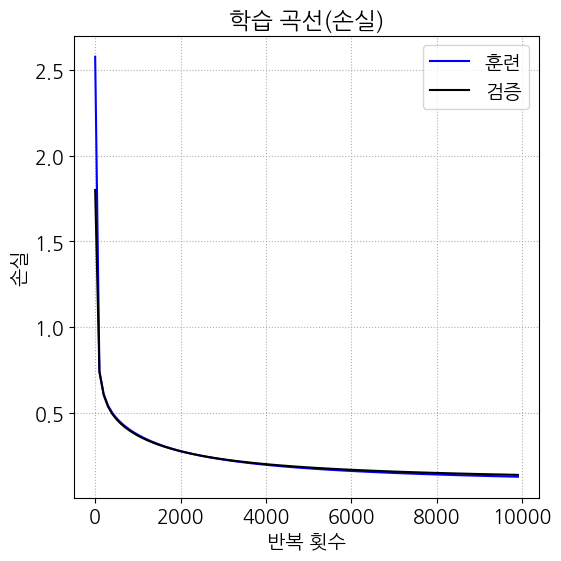

In [41]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='훈련')
plt.plot(history[:,0], history[:,3], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

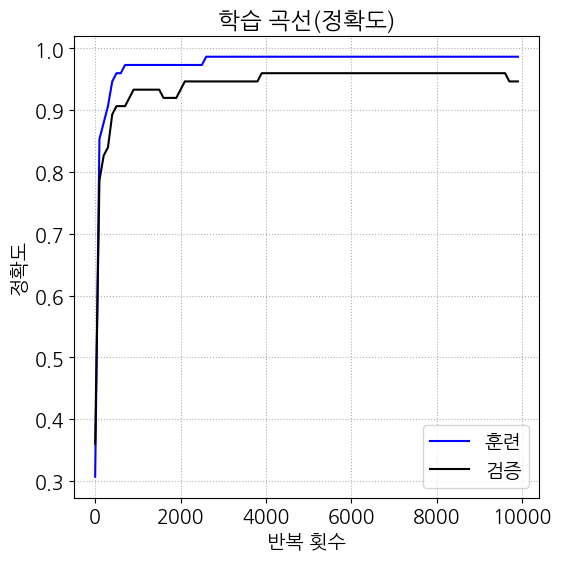

In [42]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='훈련')
plt.plot(history[:,0], history[:,4], 'k', label='검증')
plt.xlabel('반복 횟수')
plt.ylabel('정확도')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

### NLLLoss 함수 이해 하기

In [43]:
# 입력 변수 준비

# 더미 출력 데이터
outputs_np = np.array(range(1, 13)).reshape((4,3))
# 더미 정답 데이터
labels_np = np.array([0, 1, 2, 0]) 

# 텐서화
outputs_dummy = torch.tensor(outputs_np).float()
labels_dummy = torch.tensor(labels_np).long()

# 결과 확인
print(outputs_dummy.data)
print(labels_dummy.data)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([0, 1, 2, 0])


In [44]:
# NLLLoss 함수 호출

nllloss = nn.NLLLoss()
loss = nllloss(outputs_dummy, labels_dummy) # -(1 + 5 + 9 + 10)/4 = -6.25
print(loss.item())

-6.25


### 모델 클래스측에 LogSoftmax 함수를 포함

In [45]:
# 모델 정의
# 2입력 3출력 로지스틱 회귀 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        # logsoftmax 함수 정의
        self.logsoftmax = nn.LogSoftmax(dim=1)

        # 초깃값을 모두 1로 함
        # "딥러닝을 위한 수학"과 조건을 맞추기 위한 목적
        # self.l1.weight.data.fill_(1.0)
        # self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.logsoftmax(x1)
        return x2

In [46]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： NLLLoss 함수
criterion = nn.NLLLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

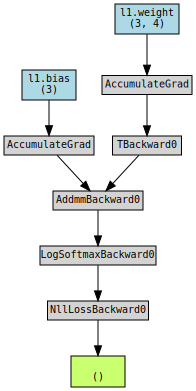

In [47]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels)

# 손실의 계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [48]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： NLLLoss 함수
criterion = nn.NLLLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10000

# 평가 결과 기록
history = np.zeros((0,5))

In [49]:
for epoch in range(num_epochs):

    # 훈련 페이즈

    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs) #logsoftmax 

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], train loss: {train_loss:.5f} train acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], train loss: 2.12809 train acc: 0.30667 val_loss: 2.18588, val_acc: 0.36000
Epoch [10/10000], train loss: 1.29681 train acc: 0.45333 val_loss: 1.41419, val_acc: 0.29333
Epoch [20/10000], train loss: 1.15617 train acc: 0.40000 val_loss: 1.22674, val_acc: 0.25333
Epoch [30/10000], train loss: 1.08701 train acc: 0.37333 val_loss: 1.14096, val_acc: 0.22667
Epoch [40/10000], train loss: 1.02828 train acc: 0.41333 val_loss: 1.07250, val_acc: 0.30667
Epoch [50/10000], train loss: 0.97725 train acc: 0.48000 val_loss: 1.01361, val_acc: 0.40000
Epoch [60/10000], train loss: 0.93284 train acc: 0.61333 val_loss: 0.96256, val_acc: 0.46667
Epoch [70/10000], train loss: 0.89407 train acc: 0.61333 val_loss: 0.91820, val_acc: 0.56000
Epoch [80/10000], train loss: 0.86009 train acc: 0.64000 val_loss: 0.87949, val_acc: 0.54667
Epoch [90/10000], train loss: 0.83017 train acc: 0.65333 val_loss: 0.84555, val_acc: 0.54667
Epoch [100/10000], train loss: 0.80366 train acc: 0.65333 val_loss: 0.8

In [50]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 2.18588  정확도 : 0.36000
최종상태 : 손실 : 0.13546  정확도 : 0.94667


In [51]:
# 패턴 2 모델의 출력 결과
w = outputs[:5,:].data
print(w.numpy())

# 확률값을 얻고 싶은 경우
print(torch.exp(w).numpy())

[[ -4.8479  -0.1029  -2.4082]
 [ -5.02    -0.0226  -4.1506]
 [ -0.0661  -2.7497 -16.0479]
 [-11.5789  -3.1836  -0.0423]
 [ -9.323   -1.7407  -0.193 ]]
[[0.0078 0.9022 0.09  ]
 [0.0066 0.9776 0.0158]
 [0.9361 0.0639 0.    ]
 [0.     0.0414 0.9586]
 [0.0001 0.1754 0.8245]]


### 모델 클래스측에 소프트맥스 함수 만 포함된 경우

In [52]:
# 모델 정의
# 2입력 3출력 로지스틱 회귀 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        # 소프트맥스 함수 정의
        self.softmax = nn.Softmax(dim=1)

        # 초깃값을 모두 1로 함
        # "딥러닝을 위한 수학"과 조건을 맞추기 위한 목적
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.softmax(x1)
        return x2

In [53]:
# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수： NLLLoss 함수
criterion = nn.NLLLoss()

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 10000

# 평가 결과 기록
history = np.zeros((0,5))

In [54]:
for epoch in range(num_epochs):

    # 훈련 페이즈

    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 여기서 로그 함수를 적용함
    outputs2 = torch.log(outputs)

    # 손실 계산
    loss = criterion(outputs2, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = torch.max(outputs, 1)[1]

    # 손실과 정확도 계산
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 여기서 로그 함수를 적용함
    outputs2_test = torch.log(outputs_test)

    # 손실 계산
    loss_test = criterion(outputs2_test, labels_test)

    # 예측 라벨 산출
    predicted_test = torch.max(outputs_test, 1)[1]

    # 손실과 정확도 계산
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)

    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09158, val_acc: 0.26667
Epoch [10/10000], loss: 1.01848 acc: 0.40000 val_loss: 1.04171, val_acc: 0.26667
Epoch [20/10000], loss: 0.96854 acc: 0.40000 val_loss: 0.98850, val_acc: 0.26667
Epoch [30/10000], loss: 0.92459 acc: 0.65333 val_loss: 0.93996, val_acc: 0.57333
Epoch [40/10000], loss: 0.88568 acc: 0.70667 val_loss: 0.89704, val_acc: 0.62667
Epoch [50/10000], loss: 0.85120 acc: 0.70667 val_loss: 0.85918, val_acc: 0.62667
Epoch [60/10000], loss: 0.82059 acc: 0.70667 val_loss: 0.82572, val_acc: 0.62667
Epoch [70/10000], loss: 0.79335 acc: 0.72000 val_loss: 0.79607, val_acc: 0.62667
Epoch [80/10000], loss: 0.76900 acc: 0.72000 val_loss: 0.76968, val_acc: 0.65333
Epoch [90/10000], loss: 0.74717 acc: 0.72000 val_loss: 0.74610, val_acc: 0.65333
Epoch [100/10000], loss: 0.72750 acc: 0.76000 val_loss: 0.72494, val_acc: 0.69333
Epoch [110/10000], loss: 0.70970 acc: 0.77333 val_loss: 0.70585, val_acc: 0.74667
Epoch [120/10000], loss: 0.

In [55]:
# 손실과 정확도 확인

print(f'초기상태 : 손실 : {history[0,3]:.5f}  정확도 : {history[0,4]:.5f}' )
print(f'최종상태 : 손실 : {history[-1,3]:.5f}  정확도 : {history[-1,4]:.5f}' )

초기상태 : 손실 : 1.09158  정확도 : 0.26667
최종상태 : 손실 : 0.13724  정확도 : 0.96000


In [56]:
# 패턴 3 모델의 출력값
w = outputs[:5,:].data.numpy()
print(w)

[[0.0059 0.9056 0.0885]
 [0.0069 0.9792 0.0139]
 [0.9452 0.0548 0.    ]
 [0.     0.0404 0.9596]
 [0.0001 0.1743 0.8256]]
